# PART 1 EXPLORATORY DATA ANALYSIS

The  attached  logins.json   file  contains  (simulated)  timestamps  of  user  logins  in  a  particular 
geographic  location.  Aggregate  these  login  counts  based  on  15­ minute  time  intervals,  and 
visualize  and  describe  the  resulting  time  series  of  login  counts  in  ways  that  best  characterize  the 
underlying  patterns  of  the  demand.  Please  report/illustrate  important  features  of  the  demand, 
such  as  daily  cycles.  If  there  are  data  quality  issues,  please  report  them. 

### Importing Necessory features
We are going to read 'logins.json' file. It required to import libraries such as pandas, numpy in order to read json data and convert it into dataframe. Also seaborn and matplotlib is imported in order to plot and visulize underlying patterns within givern data.

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


plt.style.use('ggplot')



### Reading Dataset and inspecting 


In [65]:
df = pd.read_json (r'logins.json')

In [66]:
df['online'] = 1

In [67]:
df.head()

,login_time,online
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
login_time    93142 non-null datetime64[ns]
online        93142 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [69]:
df['login_time'].describe()

count                   93142
unique                  92265
top       1970-02-12 11:16:53
freq                        3
first     1970-01-01 20:12:16
last      1970-04-13 18:57:38
Name: login_time, dtype: object

### Converting dataframe into 15 min aggregate

In [70]:
agg_15 = df.set_index('login_time').groupby(pd.Grouper(freq='15Min')).aggregate(np.sum)

In [71]:
agg_15.head()

,online
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [72]:
agg_15.shape

(9788, 1)

### Visluzing pattern

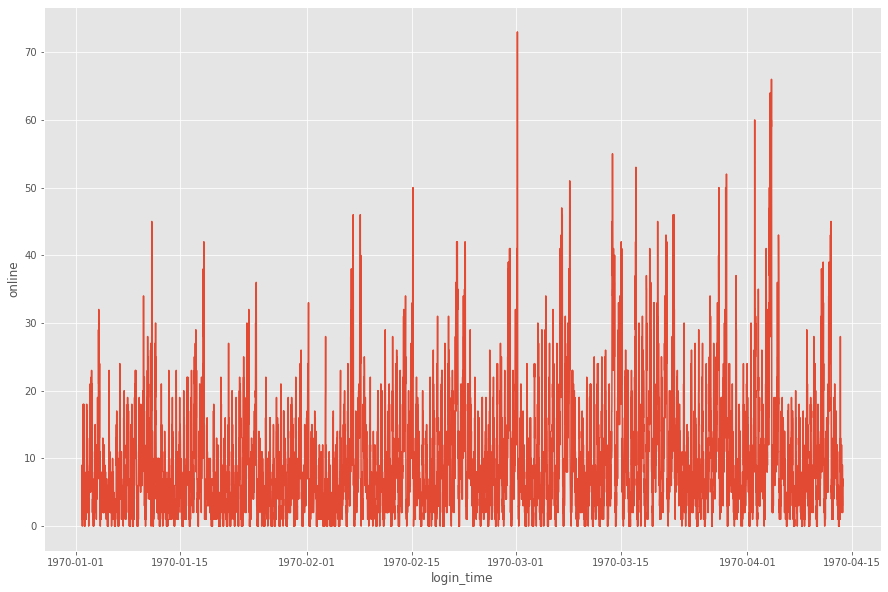

In [73]:
plt.subplots(figsize=(15,10))
sns.lineplot(x= agg_15.index, y = 'online', data = agg_15)

Above pattern is very congested and hard to read. Athough still we can identify several spikes in it and we can see those spikes are occuring at rregular interval. It is better to take subset of above plots and visulize it. Hence, below plot diplays two week subset of above plot.

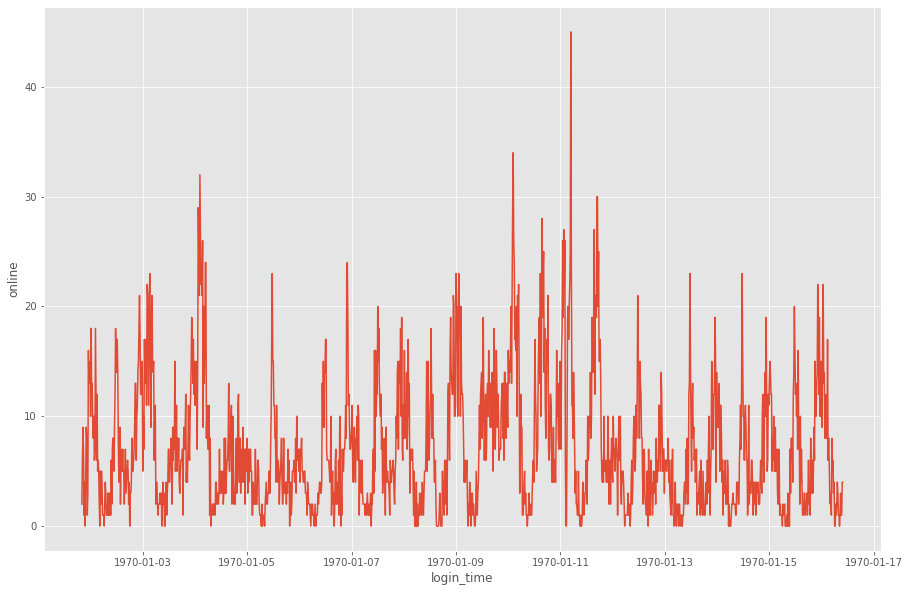

In [74]:
plt.subplots(figsize=(15,10))
sns.lineplot(x= agg_15.index[:1400], y = 'online', data = agg_15[:1400])

### Extra Exploration: By day of week

In [75]:
agg_24 = agg_15.groupby(pd.Grouper(freq='d')).aggregate(np.sum)

In [76]:
agg_24['weekday'] = agg_24.index.dayofweek

In [77]:
df_weekday = agg_24.groupby('weekday')['online'].mean()

In [78]:
df_weekday

weekday
0     588.200000
1     662.000000
2     738.500000
3     797.333333
4    1013.866667
5    1291.800000
6    1211.133333
Name: online, dtype: float64

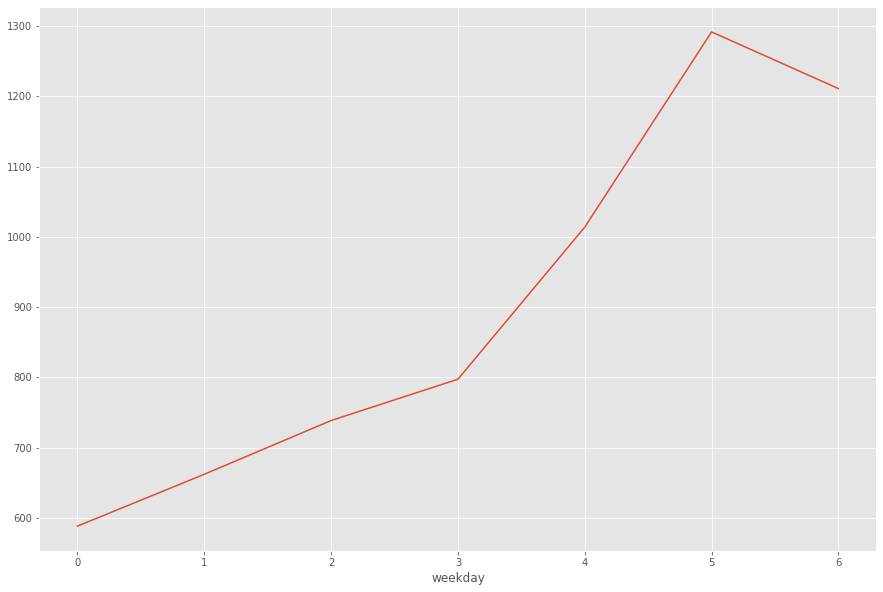

In [79]:
plt.subplots(figsize=(15,10))
sns.lineplot(x= df_weekday.index, y = df_weekday.values)

## Part 2: Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
how you will implement the experiment.
what statistical test(s) you will conduct to verify the significance of the observation.
how you would interpret the results and provide recommendations to the city operations team along with any caveats.


### Solution:
With regard to the key measure of success, I would choose a metric that describes the percentage of time a driver spends in either city. At this point, since the drivers tend to be exclusive to both cities, the metric for the average Gotham driver would look something like 100% time in Gotham and 0% time in Metropolis. In a perfectly successful experiment, we would see the metric shift closer to 50% time in Gotham and 50% time in Metropolis. In a less successful experiment, we would see the metric shift closer to 75% time in Gotham and 25% time in Metropolis. If the metric for the average Gotham driver flips to favor time in Metropolis, there is something wrong and we have incentivized time in Metropolis too much and we may see the average Metropolis driver stay in Metropolis and vice versa. Using a metric such as this one allows us to track real activity in the drivers of both cities and the maximization of such a metric results in a balance of time in both cities.

We should also keep in mind revenue as a secondary metric to look at, since this is usually the main reason for solving a business problem. Using revenue as a main metric, however, can be problematic because the real reasons for movements in revenue are not always apparent. Maximizing revenue may be good for short-term bottom line results, but not great for long-term growth. For example, seeking to maximize revenue may result in incentives to drive in only Gotham or only Metropolis due to increased fares in either city, which would cause us to alienate an entire group of drivers and customers.

I would set up the experiment in the following way:

Current scenario: Average time split for the average Gotham driver is close to 100% Gotham, 0% Metropolis. Average time split for the average Metropolis driver is close to 100% Metropolis, 0% Gotham.
Goal: Push the average time split for both the average Gotham driver and average Metropolis closer to 50% Gotham, 50% Metropolis.

The experiment consists of offering full reimbursements to all toll costs, and can be tested during two times of the year: 1) when it is easy to drive (summer) and 2) when it is difficult to drive (winter). For the purposes of this challenge, let's focus on a typical summer month when the experiment will be run for one month.

We can measure the results of the experiment with a one-tailed z-test where we can test whether the average Gotham driver's time spent in Gotham is meaningfully below 100% and whether the average Metropolis driver's time spent in Metropolis is meaningully below 100%. Alternatively, we could also test whether either time spent is meaningfully above 0% outside of a driver's native city. A one-tailed test is appropriate since we want to test whether the average percent of time has changed to either above 0% or below 100% (depending on the scenario we want to test as described previously). A z-test is appropriate because we can obtain a rather large sample size (easily >30) and we likely know or can find the population's standard deviation under normal operation.

We can interpret the results in the form of a confidence interval. To be safe, a 95% confidence interval could be useful. In this way, we can present our findings such as: We are 95% confident that the mean percent of time the average Gotham driver spends driving in Gotham has dropped to 75% give or take 5%. In this way we can easily show whether the test worked and whether drivers from each city are spending more time outside of their native cities. Two caveats, as described when exploring metrics, might be that:

Profits may have dropped depending on how many drivers move between each city. It is possible that, since demand for drivers has not been increased, profits will drop because the company is now reimbursing toll expenses while not increasing revenue. This may be of lesser concern because our main goal is to incentivize drivers to operate in both cities.
We may find that we incentivised too well. For example, if we are 95% confident that the mean percent of time the average Gotham driver spends driving in Gotham has dropped to 35% give or take 5%, we could see that the metric for Metropolis drivers has not moved meaningfully. In this case, we should incentivize differently since it may not always be a good thing that the metrics have move in a statistically significant way.


## Part 3: Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

## Data description

* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYY MM DD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [80]:
# Read in the data
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [81]:
df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [82]:
# Since the date fields have been read in as 'object' data types, we should convert them to proper datetime format
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [83]:
# Do the features take values we might expect?
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000



We read in the data and inspected it. We see that while the numerical features take values we might expect (percents are between 0 and 100, for example), there are a few features that are missing values. Let's take a closer look:

In [84]:

# Look closer at missing values - how many exactly?

for column in list(df.columns):
    num_missing = len(df[df[column].isnull()])
    if num_missing != 0:
        print('There are {} missing values in {}'.format(num_missing, column))

There are 8122 missing values in avg_rating_of_driver
There are 396 missing values in phone
There are 201 missing values in avg_rating_by_driver


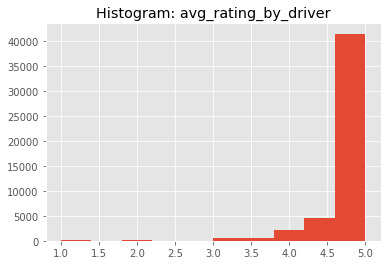

In [85]:
# Let's look at the distribution of values for avg_rating_by_driver

plt.hist(df[np.logical_not(df['avg_rating_by_driver'].isnull())]['avg_rating_by_driver'])
plt.title('Histogram: avg_rating_by_driver')
plt.show;

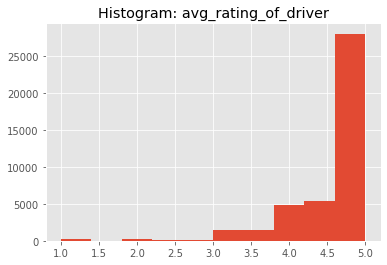

In [86]:

plt.hist(df[np.logical_not(df['avg_rating_of_driver'].isnull())]['avg_rating_of_driver'])
plt.title('Histogram: avg_rating_of_driver')
plt.show;

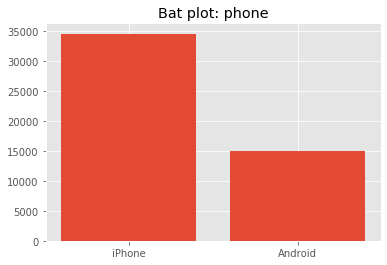

In [87]:
# Let's look at the distribution of values for phone

plt.bar([1,2], df[np.logical_not(df['phone'].isnull())]['phone'].value_counts(), align='center')
plt.xticks([1,2], ['iPhone', 'Android'])
plt.title('Bat plot: phone')
plt.show;

In [88]:
# Fill in missing values

df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

In [89]:
# Make lists of each feature type for easy plotting

numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

categorical_features = ['city', 'phone', 'ultimate_black_user']

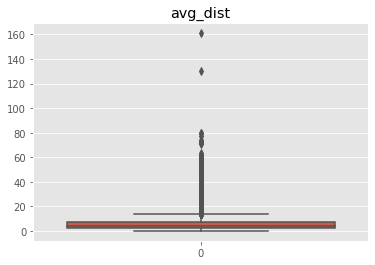

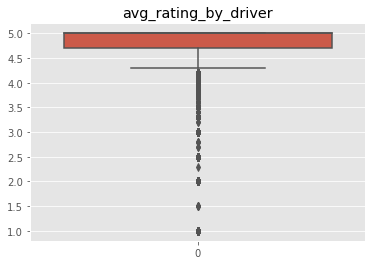

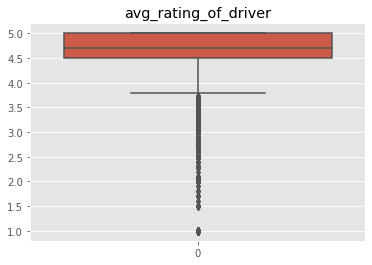

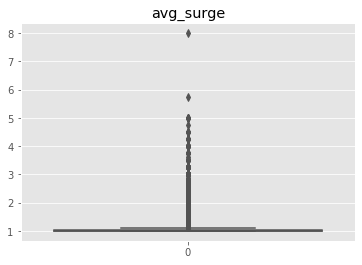

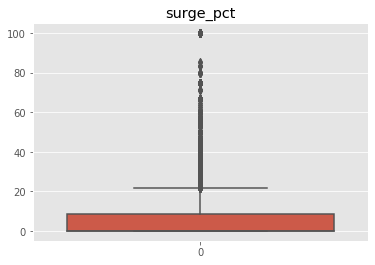

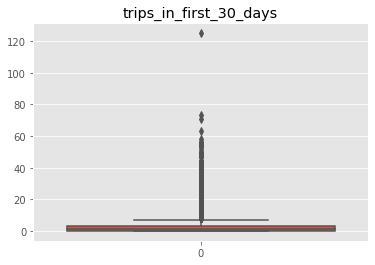

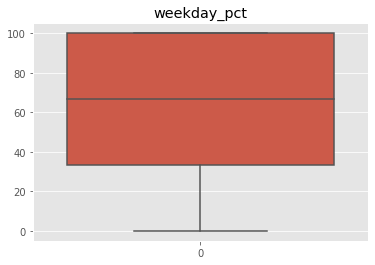

In [90]:

import seaborn as sns

for feature in numerical_features:
    sns.boxplot(data=df[feature])
    plt.title(feature)
    plt.show();

In [91]:
# Filter out rows with features that have values more than 3 standard deviations from the mean
df = df[np.abs(df['avg_dist']-df['avg_dist'].mean())<=(3*df['avg_dist'].std())]
df = df[np.abs(df['avg_rating_by_driver']-df['avg_rating_by_driver'].mean())<=(3*df['avg_rating_by_driver'].std())]
df = df[np.abs(df['avg_rating_of_driver']-df['avg_rating_of_driver'].mean())<=(3*df['avg_rating_of_driver'].std())]
df = df[np.abs(df['avg_surge']-df['avg_surge'].mean())<=(3*df['avg_surge'].std())]
df = df[np.abs(df['surge_pct']-df['surge_pct'].mean())<=(3*df['surge_pct'].std())]
df = df[np.abs(df['trips_in_first_30_days']-df['trips_in_first_30_days'].mean())<=(3*df['trips_in_first_30_days'].std())]
df.reset_index(drop=True, inplace=True)

In [92]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,44666.000000,44666.000000,44666.000000,44666.000000,44666.000000,44666.000000,44666.000000
mean,2.008530,4.641089,1.043403,5.733392,61.459837,5.377194,4.822483
std,2.532519,0.453546,0.098875,11.578430,36.346273,4.321845,0.287647
min,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,3.500000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.440000,4.700000
50%,1.000000,4.800000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.030000,6.300000,100.000000,6.770000,5.000000
max,14.000000,5.000000,1.710000,54.500000,100.000000,22.910000,5.000000


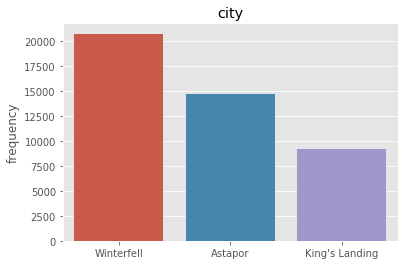

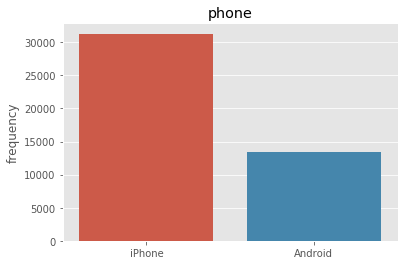

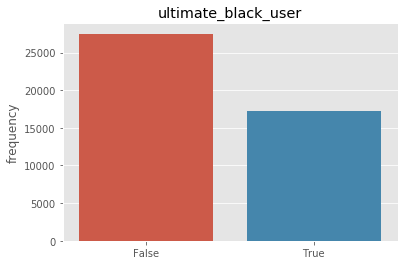

In [93]:
# Create box plots of all categorical, non-date data

for feature in categorical_features:
    sns.barplot(x = list(df[np.logical_not(df[feature].isnull())][feature].value_counts().index), 
                y = df[np.logical_not(df[feature].isnull())][feature].value_counts())
    plt.title(feature)
    plt.ylabel('frequency')
    plt.show();

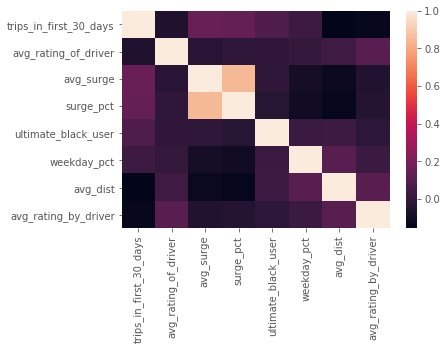

In [94]:
# Show the correlation matrix
corr_matrix = df.corr()
corr_matrix
sns.heatmap(corr_matrix)

In [95]:

# Filter to see if there are any features correlated at above 0.50 or below -0.50
corr_matrix[(abs(corr_matrix) >= 0.50) & (abs(corr_matrix) < 1.0)]

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_of_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_surge,NaN,NaN,NaN,0.849852,NaN,NaN,NaN,NaN
surge_pct,NaN,NaN,0.849852,NaN,NaN,NaN,NaN,NaN
ultimate_black_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_dist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_by_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:

# When was the last trip date in the dataset?
sorted(df['last_trip_date'].unique())[-10:]

[numpy.datetime64('2014-06-22T00:00:00.000000000'),
 numpy.datetime64('2014-06-23T00:00:00.000000000'),
 numpy.datetime64('2014-06-24T00:00:00.000000000'),
 numpy.datetime64('2014-06-25T00:00:00.000000000'),
 numpy.datetime64('2014-06-26T00:00:00.000000000'),
 numpy.datetime64('2014-06-27T00:00:00.000000000'),
 numpy.datetime64('2014-06-28T00:00:00.000000000'),
 numpy.datetime64('2014-06-29T00:00:00.000000000'),
 numpy.datetime64('2014-06-30T00:00:00.000000000'),
 numpy.datetime64('2014-07-01T00:00:00.000000000')]


Based on the last trip date in the dataset of 7/1/2014, it looks like the data was pulled on July 1st, 2014. By definition, retained users made a trip within the last 30 days of this date. Let's see how many users have been retained:

In [97]:
print('{:.2f}% of users have taken a trip on or after June 1st, 2014 and are considered \'retained\'.'\
      .format(len(df[df['last_trip_date'] >= '2014-06-01'])/len(df)*100))

38.59% of users have taken a trip on or after June 1st, 2014 and are considered 'retained'.


### Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [98]:

# Create the target variable, retained

df['retained'] = np.nan
df.loc[df['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df.loc[df['last_trip_date'] < '2014-06-01', 'retained'] = 0

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0.0


In [99]:
# Drop last_trip_date
df.drop('last_trip_date', axis=1, inplace=True)

We will move forward by splitting this data into train and test sets, and model the data with a decision tree classifier. In addition, the decision tree does not handle data if it is not numerical in nature. We must drop all datetime features and one-hot-encode any categorical features.

The decision tree is a good choice in this scenario due to its interpretability and ease of finding the most predictive features of retention. In addition, the decision tree gives the best baseline accuracy compared to logistic regression, naive bayes, k-nearest-neighbors, random forest, bagged random forest, and bagged random (extra) tree classifiers.

In [100]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [101]:
# Drop other datetime features
df.drop('signup_date', axis=1, inplace=True)

In [102]:
# One-hot-encode all categorical features
df_encoded = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])

df_encoded.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1.0,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0.0,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0.0,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1.0,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0.0,0,0,1,1,0,1,0


In [103]:
# Split into train and test sets

train, test = train_test_split(df_encoded, test_size=.30, 
                               random_state=42, stratify=df_encoded['retained'])

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

print('Train shape: {}\n Test shape: {}'.format(train.shape, test.shape))


target = train['retained']
train = train.drop('retained', axis=1)

Train shape: (31266, 15)
 Test shape: (13400, 15)


In [104]:
# Perform cross validation on the training set

from sklearn.model_selection import KFold


clf = DecisionTreeClassifier(max_depth=4)

kf = KFold(n_splits=10)
print(kf)

# for train_index, test_index in kf.split(X):
cv_count = 1
for traincv, testcv in cv.split(train):  
        preds = clf.fit(train.loc[list(traincv),:], 
                        target.loc[list(traincv),]).predict(train.loc[list(testcv),:])
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(target.loc[testcv,], preds)

        print('Round {} CV\nAccuracy: {:.2f}\nAUC: {:.4f}\nConfusion Matrix:\n{}\n\n'\
                  .format(cv_count, accuracy_score(target.loc[testcv,], preds)*100, 
                          auc(false_positive_rate, true_positive_rate),
                          confusion_matrix(target.loc[testcv,], preds)))
        cv_count += 1

KFold(n_splits=10, random_state=None, shuffle=False)
Round 1 CV
Accuracy: 73.90
AUC: 0.7243
Confusion Matrix:
[[1521  412]
 [ 404  790]]


Round 2 CV
Accuracy: 73.90
AUC: 0.7273
Confusion Matrix:
[[1472  397]
 [ 419  839]]


Round 3 CV
Accuracy: 75.38
AUC: 0.7405
Confusion Matrix:
[[1537  390]
 [ 380  820]]


Round 4 CV
Accuracy: 74.64
AUC: 0.7298
Confusion Matrix:
[[1535  370]
 [ 423  799]]


Round 5 CV
Accuracy: 74.22
AUC: 0.7269
Confusion Matrix:
[[1526  396]
 [ 410  795]]


Round 6 CV
Accuracy: 75.31
AUC: 0.7343
Confusion Matrix:
[[1576  364]
 [ 408  779]]


Round 7 CV
Accuracy: 75.18
AUC: 0.7407
Confusion Matrix:
[[1528  416]
 [ 360  822]]


Round 8 CV
Accuracy: 72.20
AUC: 0.7062
Confusion Matrix:
[[1502  449]
 [ 420  755]]


Round 9 CV
Accuracy: 75.46
AUC: 0.7365
Confusion Matrix:
[[1559  340]
 [ 427  800]]


Round 10 CV
Accuracy: 74.38
AUC: 0.7317
Confusion Matrix:
[[1502  410]
 [ 391  823]]




In [105]:
# Train the model on the full training data and test on the test set
final_clf = clf.fit(train, target)

test_target = test['retained']
test = test.drop('retained', axis=1)

test_preds = final_clf.predict(test)



print('Test set accuracy: {:.2f}\nConfusion Matrix:\n{}'\
          .format(accuracy_score(test_target, test_preds)*100, 
                  confusion_matrix(test_target, test_preds)))

Test set accuracy: 74.11
Confusion Matrix:
[[6479 1750]
 [1719 3452]]


In [106]:
# Find feature importances
feature_importance = pd.DataFrame(final_clf.feature_importances_)
feature_importance.index = list(train.columns)
feature_importance.columns = ['importance']
feature_importance.sort_values(by='importance', ascending=False)

,importance
avg_rating_by_driver,0.461056
city_King's Landing,0.217964
surge_pct,0.159222
phone_Android,0.060958
phone_iPhone,0.041617
avg_surge,0.028204
trips_in_first_30_days,0.019828
city_Astapor,0.011149
avg_rating_of_driver,0.000000
weekday_pct,0.000000


In terms of model validity, this model is somewhat valid. I don't believe this data is appropriate for the task at hand since we have data for all 6-7 months of user activity and the resulting retention label. If we really want to find early predictors of retention, we should have had user activity up to January, no data for 6 months, and then apply retention labels to build a model to determine whether a user may still be riding with Ultimate after 6 months. This model may be good for determining whether a user is retained, but, since we already have all the data, we essentially know whether a user is retained as of right now by looking at the last date of activity.


### Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).
To improve longterm rider retention, Ultimate might want to focus on the top predictors of model performance:

**avg_rating_by_driver:** This indicates that riders with less that or equal to rating 4.95 tend to retain more. This is probabily because riders with an extremely high rating do not ride very often and, in turn, do not get rated very often.

**city_King's_Landing:** This indicates that riders not from King's Landing tend to be retained more. It is possible that something is happening in this city with drivers or users that is not properly incentivizing retention.

**surge_pct:** This indicates that users that take less than or equal to 25% of their trips with a surge multipler greater than 1 tend to be retained more. This could signify that surges are too high and could use a reduction to increase user retention.